## Import Libraries

In [13]:
# !pip install tensorflow
# !pip install opencv-python

import numpy as np  # linear algebra
import pandas as pd # data processing CSV file
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cv2
from scipy.ndimage import zoom
from scipy import ndimage
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import os
from PIL import Image


## Dataset Preprocessing

- Reshape to grayscale image &
- Split data into training and test sets
- Add emotional labels 

In [3]:
def read_png_to_gray_matrix(folder_path, processed_dataset):
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):
            file_path = os.path.join(folder_path, filename)
            image = Image.open(file_path)
            gray_matrix = image.convert('L')
            dic = {"label": label_generate(folder_path), "matrix": np.asarray(gray_matrix)}
            processed_dataset.append(dic)
    return processed_dataset

In [4]:

def label_generate(path):
    if path == train_data_path[0] or path == test_data_path[0]:
        label = "angry"
        return label
    if path == train_data_path[1] or path == test_data_path[1]:
        label = "disgust"
        return label
    if path == train_data_path[2] or path == test_data_path[2]:
        label = "fear"
        return label
    if path == train_data_path[3] or path == test_data_path[3]:
        label = "happy"
        return label
    if path == train_data_path[4] or path == test_data_path[4]:
        label = "neutral"
        return label
    if path == train_data_path[5] or path == test_data_path[5]:
        label = "sad"
        return label
    if path == train_data_path[6] or path == test_data_path[6]:
        label = "surprise"
        return label
    else:
        raise ValueError("Invalid path")


In [5]:
train_data_path = [
    '../setData/original_data_set/train/angry',
    '../setData/original_data_set/train/disgust',
    '../setData/original_data_set/train/fear',
    '../setData/original_data_set/train/happy',
    '../setData/original_data_set/train/neutral',
    '../setData/original_data_set/train/sad',
    '../setData/original_data_set/train/surprise'
]

test_data_path = [
    '../setData/original_data_set/test/angry',
    '../setData/original_data_set/test/disgust',
    '../setData/original_data_set/test/fear',
    '../setData/original_data_set/test/happy',
    '../setData/original_data_set/test/neutral',
    '../setData/original_data_set/test/sad',
    '../setData/original_data_set/test/surprise'
]


In [6]:
def process_train_data(train_data_path, write_path="../setData/processed_data_set/train/data.npy", test=True):
    processed_dataset = []
    for path in train_data_path:
        # Assuming each path is a directory containing multiple PNG images
        processed_dataset = read_png_to_gray_matrix(path, processed_dataset)
       
    # Data Augmentation setting
    aug_data = []
    setMovement = True
    setSpin = True
    setFlip = True
    setZoom = True
    
    # move 10% of the data
    for data in processed_dataset:
        if setMovement:
            if random.randint(0,99) <= 10:
                moved_data = data
                offset_x = np.random.randint(-5, 5)
                offset_y = np.random.randint(-5, 5)
                moved_data["matrix"] = np.roll(data["matrix"], (offset_x, offset_y), axis=(0, 1))
                aug_data.append(moved_data)
        
    # rotate 10% of the data
    for data in processed_dataset:
        if setSpin:
            if random.randint(0,99) <= 10:
                spin_data = data
                angle = np.random.randint(-5, 5)
                spin_data["matrix"] = ndimage.rotate(data["matrix"], angle, reshape=False)
                aug_data.append(spin_data)
                
    # flip 10% of the data
    for data in processed_dataset:
        if setFlip:
            if random.randint(0,99) <= 10:
                flip_data = data
                flip_data["matrix"] = np.flip(data["matrix"], axis=1)
                aug_data.append(flip_data)
                
    # zoom 10% of the data
    for data in processed_dataset:
        if setZoom:
            if random.randint(0, 99) <= 10:
                original_size = 48
                scale_factor = np.random.uniform(1, 1.2)
                new_size = int(original_size * scale_factor)
                zoom_data = data
                resized_matrix = cv2.resize(data["matrix"], (new_size, new_size), interpolation=cv2.INTER_LINEAR)
                start = (new_size - original_size) // 2
                end = start + original_size
                cropped_matrix = resized_matrix[start:end, start:end]
                zoom_data["matrix"] = cropped_matrix
                aug_data.append(zoom_data)
    
    # merge dataset
    processed_dataset = processed_dataset + aug_data
    
    # Shuffle the training dataset
    np.random.shuffle(processed_dataset)

    # Save the processed dataset
    np.save(write_path, processed_dataset, allow_pickle=True)

    # Test output, can be set to False if not needed
    if test:
        check = np.load(write_path, allow_pickle=True)
        print(check[:5])
        print(check[5:])


def process_test_data(test_data_path, write_path="../setData/processed_data_set/test/data.npy", test=False):
    processed_dataset = []
    for path in test_data_path:
        # Assuming each path is a directory containing multiple PNG images
        processed_dataset = read_png_to_gray_matrix(path, processed_dataset)

    # Optionally shuffle the test dataset - usually, you wouldn't shuffle test data
    # np.random.shuffle(processed_dataset) # Commenting this out as it's typically not done for test sets

    # Save the processed dataset
    np.save(write_path, processed_dataset, allow_pickle=True)

    # Test output, can be set to False if not needed
    if test:
        check = np.load(write_path, allow_pickle=True)
        print(check[:5])

In [7]:
process_train_data(train_data_path)
process_test_data(test_data_path)

[{'label': 'angry', 'matrix': array([[120,  81,   8, ..., 135, 132, 132],
        [127,  79,   5, ..., 133, 135, 134],
        [131,  73,   0, ..., 133, 132, 136],
        ...,
        [228, 228, 218, ..., 217, 244, 237],
        [241, 237, 214, ..., 232, 240, 232],
        [239, 235, 226, ..., 237, 233, 245]], dtype=uint8)}
 {'label': 'neutral', 'matrix': array([[  0,   0, 130, ...,   0,   0,   0],
        [  0,   0, 167, ...,   0,   0,   0],
        [  0,   0, 167, ..., 127, 149, 169],
        ...,
        [107, 108, 106, ..., 130,   0,   0],
        [  0,   0,   0, ..., 131,   0,   0],
        [  0,   0,   0, ..., 129,   0,   0]], dtype=uint8)}
 {'label': 'neutral', 'matrix': array([[230, 229, 232, ...,  25,  36,  39],
        [220, 218, 215, ...,  10,   5,   8],
        [208, 219, 143, ...,  31,  27,  26],
        ...,
        [109, 113, 112, ..., 109,  96, 103],
        [109, 112, 112, ..., 109,  99,  98],
        [110, 110, 113, ..., 108, 110, 105]], dtype=uint8)}
 {'label': 'neu

## Dataset Visualization

Training Data Shape: (41473, 2)
   emotion                                             pixels
0    angry  [120, 81, 8, 0, 3, 14, 39, 57, 46, 28, 53, 69,...
1  neutral  [0, 0, 130, 126, 125, 120, 146, 157, 150, 161,...
2  neutral  [230, 229, 232, 199, 63, 14, 25, 28, 24, 16, 2...
3  neutral  [134, 136, 133, 159, 178, 167, 167, 155, 155, ...
4  neutral  [116, 160, 152, 160, 147, 58, 25, 40, 43, 46, ...

Test Data Shape: (7178, 2)
  emotion                                             pixels
0   angry  [83, 75, 62, 51, 56, 61, 33, 19, 13, 15, 13, 4...
1   angry  [127, 126, 123, 119, 115, 112, 111, 111, 110, ...
2   angry  [250, 251, 251, 249, 250, 250, 248, 251, 250, ...
3   angry  [94, 183, 202, 212, 214, 219, 222, 217, 200, 2...
4   angry  [73, 78, 86, 101, 113, 117, 123, 129, 127, 118...


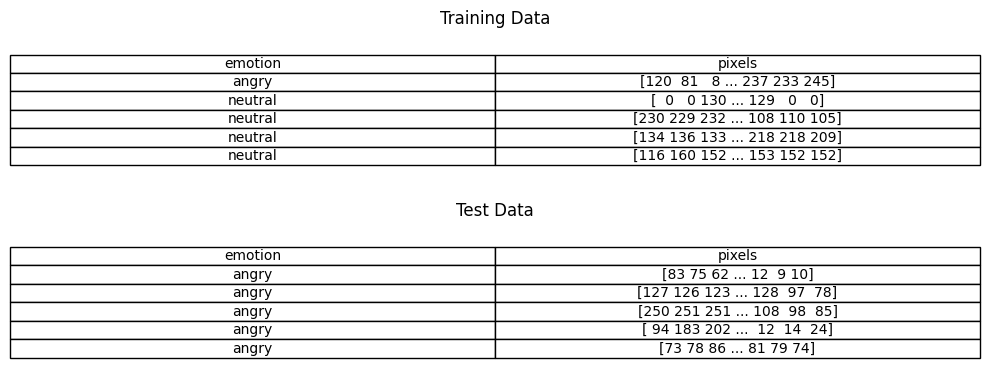

In [8]:
# Load training data from dataset
train_data_path = "../setData/processed_data_set/train/data.npy"
test_data_path = "../setData/processed_data_set/test/data.npy"

# Load data
train_data = np.load(train_data_path, allow_pickle=True)
test_data = np.load(test_data_path, allow_pickle=True)

# Convert datasets to dataframes
train_df = pd.DataFrame([{'emotion': d['label'], 'pixels': d['matrix'].flatten()} for d in train_data])
test_df = pd.DataFrame([{'emotion': d['label'], 'pixels': d['matrix'].flatten()} for d in test_data])

# Check dataset shapes & preview first 5 rows of each data
print("Training Data Shape:", train_df.shape)
print(train_df.head())
print("\nTest Data Shape:", test_df.shape)
print(test_df.head())

# Plotting the DataFrames as an image
fig, axs = plt.subplots(2, 1, figsize=(10, 4))  # Adjust the figure size as needed

# Training Data Visualization
axs[0].axis('tight')
axs[0].axis('off')
axs[0].set_title('Training Data')
table_train = axs[0].table(cellText=train_df.head().values, colLabels=train_df.columns, cellLoc='center', loc='center')

# Test Data Visualization
axs[1].axis('tight')
axs[1].axis('off')
axs[1].set_title('Test Data')
table_test = axs[1].table(cellText=test_df.head().values, colLabels=test_df.columns, cellLoc='center', loc='center')

plt.tight_layout()
plt.show()

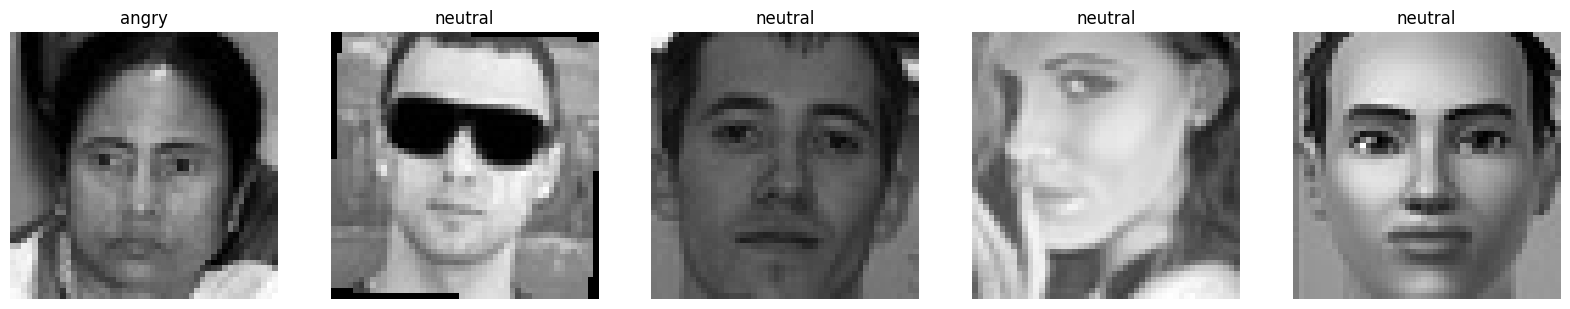

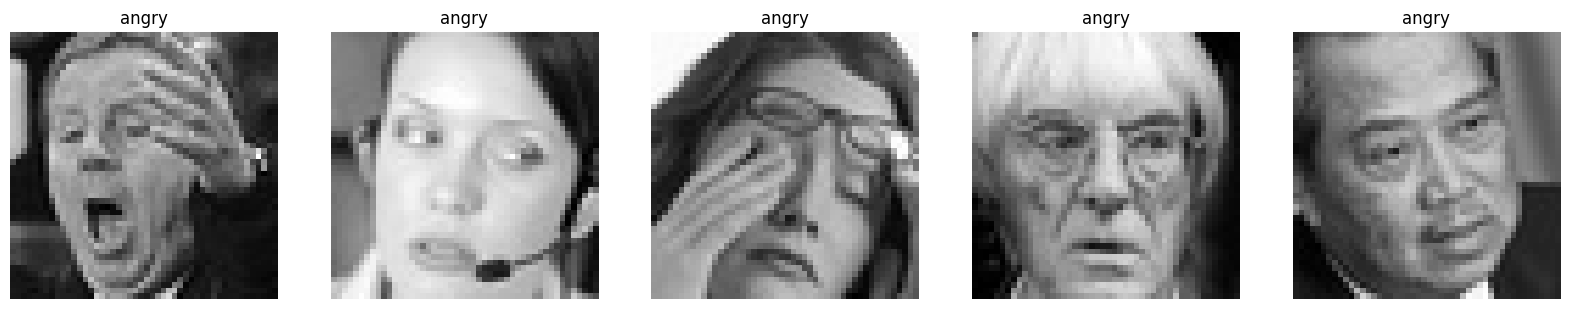

In [9]:
# Function to plot the first 5 images and their labels
def plot_first_five_images(df):
    fig, axes = plt.subplots(1, 5, figsize=(20, 4)) # Creates a figure with 5 subplots
    for i, ax in enumerate(axes.flat):
        # Assuming the images are square, compute the size for reshape
        img_size = int(len(df['pixels'].iloc[i]) ** 0.5)
        img = df['pixels'].iloc[i].reshape(img_size, img_size)
        
        ax.imshow(img, cmap='gray') # Display an image in grayscale
        ax.set_title(df['emotion'].iloc[i]) # Set the title to the image's emotion
        ax.axis('off') # Hide the axes ticks

    plt.show()

# Assuming df is your DataFrame containing the data
plot_first_five_images(train_df)
plot_first_five_images(test_df)


In [14]:
def print_emotion_counts(df, dataset_name):
    emotion_counts = df['emotion'].value_counts().reset_index()
    emotion_counts.columns = ['emotion', 'number']
    print(f"{dataset_name} Dataset Emotion Counts:")
    print(emotion_counts)

# Calculate and print emotion counts for both datasets
print_emotion_counts(train_df, "Training")
print()
print_emotion_counts(test_df, "Testing")


Training Dataset Emotion Counts:
    emotion  number
0     happy   10445
1   neutral    7191
2       sad    6966
3      fear    5929
4     angry    5739
5  surprise    4565
6   disgust     638

Testing Dataset Emotion Counts:
    emotion  number
0     happy    1774
1       sad    1247
2   neutral    1233
3      fear    1024
4     angry     958
5  surprise     831
6   disgust     111


/var/folders/6h/7snzfhy12zq8rv3fvwh7h4b80000gn/T/ipykernel_75225/3707285847.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='emotion', y='number', data=emotion_counts_sorted, palette=colors)


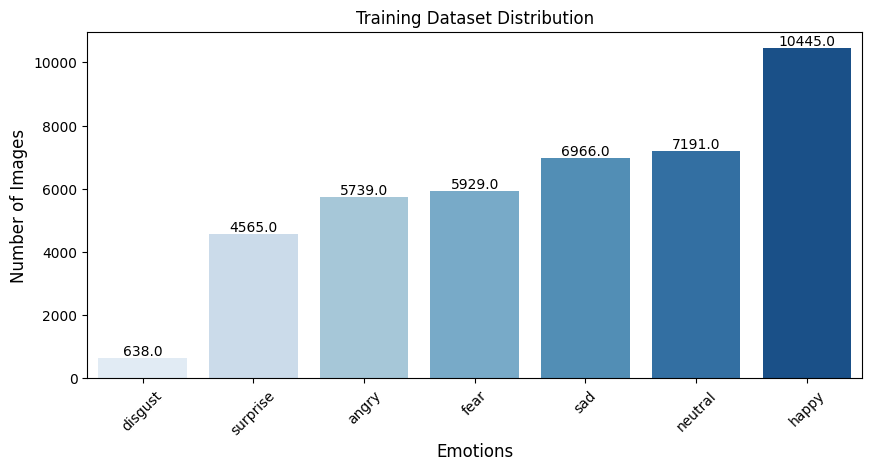

/var/folders/6h/7snzfhy12zq8rv3fvwh7h4b80000gn/T/ipykernel_75225/3707285847.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='emotion', y='number', data=emotion_counts_sorted, palette=colors)


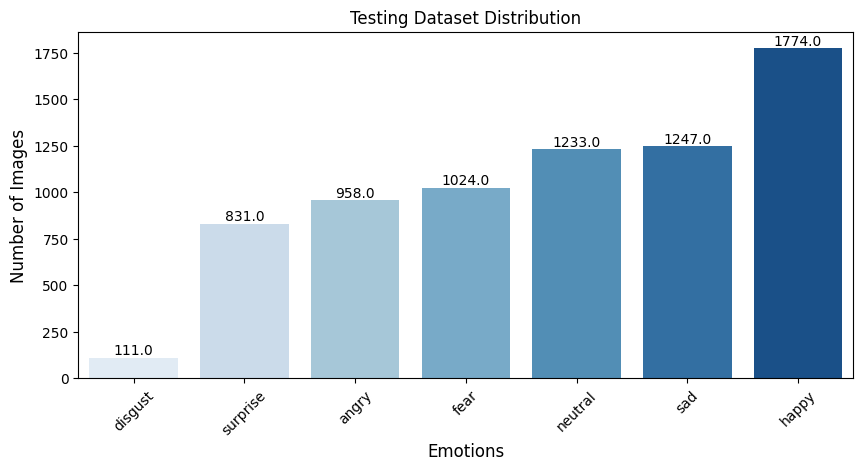

In [11]:
# Function to plot emotion distribution
def plot_emotion_distribution(df, dataset_name):
    emotion_counts = df['emotion'].value_counts().reset_index()
    emotion_counts.columns = ['emotion', 'number']
    emotion_counts_sorted = emotion_counts.sort_values(by='number', ascending=True)
    colors = sns.color_palette("Blues", len(emotion_counts_sorted))
    
    plt.figure(figsize=(10, 4.5))
    bar_plot = sns.barplot(x='emotion', y='number', data=emotion_counts_sorted, palette=colors)
    plt.title(f'{dataset_name} Dataset Distribution')
    plt.ylabel('Number of Images', fontsize=12)
    plt.xlabel('Emotions', fontsize=12)
    plt.xticks(rotation=45)
    
    for p in bar_plot.patches:
        bar_plot.annotate(format(p.get_height(), '.1f'),
                          (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
    plt.show()

# Plot emotion distribution for both datasets
plot_emotion_distribution(train_df, "Training")
plot_emotion_distribution(test_df, "Testing")


## Random Forest

In [3]:
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load training and testing data
train_data_path = "../setData/processed_data_set/train/data.npy"
train_data = np.load(train_data_path, allow_pickle=True)
test_data_path = "../setData/processed_data_set/test/data.npy"
test_data = np.load(test_data_path, allow_pickle=True)

In [4]:
# Prepare features (X) and labels (y)
X_train = np.array([data['matrix'].flatten() for data in train_data])
y_train = np.array([data['label'] for data in train_data])
X_test = np.array([data['matrix'].flatten() for data in test_data])
y_test = np.array([data['label'] for data in test_data])

# Convert labels from string to integer
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


True

In [17]:
# Initialize Random Forest Model
accuracies = []
tree_counts = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
confusion_matrices = []  
oob_errors = []


for num_trees in tree_counts:
    rtree = cv2.ml.RTrees_create()
    criteria = (cv2.TERM_CRITERIA_MAX_ITER, num_trees, 0.01)
    rtree.setTermCriteria(criteria)
    rtree.setMaxCategories(len(np.unique(y_train_encoded)))
    rtree.setMinSampleCount(2)
    rtree.setMaxDepth(1000)
    rtree.train(X_train.astype(np.float32), cv2.ml.ROW_SAMPLE, y_train_encoded.astype(np.int32))
    
    # Evaluate the model
    _, y_hat = rtree.predict(X_test.astype(np.float32))
    accuracy = accuracy_score(y_test_encoded, y_hat)
    accuracies.append(accuracy)
    
    # Generate and store the confusion matrix
    cm = confusion_matrix(y_test_encoded, y_hat)
    confusion_matrices.append(cm)
    
    print(f"Trained with {num_trees} trees: Accuracy = {accuracy:.4f}")

Trained with 10 trees: Accuracy = 0.3518
Trained with 20 trees: Accuracy = 0.3908
Trained with 30 trees: Accuracy = 0.3945
Trained with 40 trees: Accuracy = 0.4154
Trained with 50 trees: Accuracy = 0.4235
Trained with 60 trees: Accuracy = 0.4347
Trained with 70 trees: Accuracy = 0.4298
Trained with 80 trees: Accuracy = 0.4400
Trained with 90 trees: Accuracy = 0.4416
Trained with 100 trees: Accuracy = 0.4452


## Random Forest Model Evaluation

#### Accuracy Graph: 

<Figure size 1000x500 with 0 Axes>

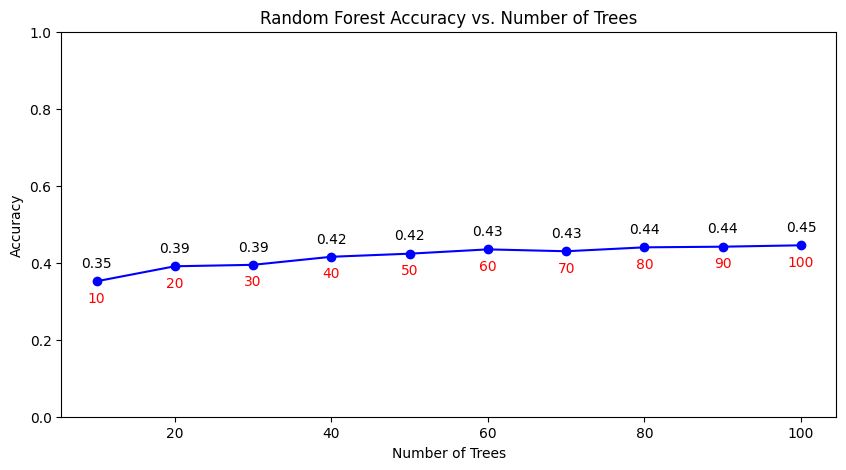

In [38]:
# Plotting the accuracies
plt.figure(figsize=(10, 5))

plt.figure(figsize=(10, 5))
plt.plot(tree_counts, accuracies, marker='o', linestyle='-', color='b')  
plt.title('Random Forest Accuracy vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  

# Loop through the data points and annotate each point with its accuracy
for i, txt in enumerate(accuracies):
    # training accuracy
    plt.annotate(f"{txt:.2f}",  
                 (tree_counts[i], accuracies[i]),  
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center') 

    # tree count
    plt.annotate(f"{tree_counts[i]}", 
                 (tree_counts[i], accuracies[i]),
                 textcoords="offset points", 
                 xytext=(0,-15), 
                 ha='center', color='red')

plt.show()

#### Confusion Matrix

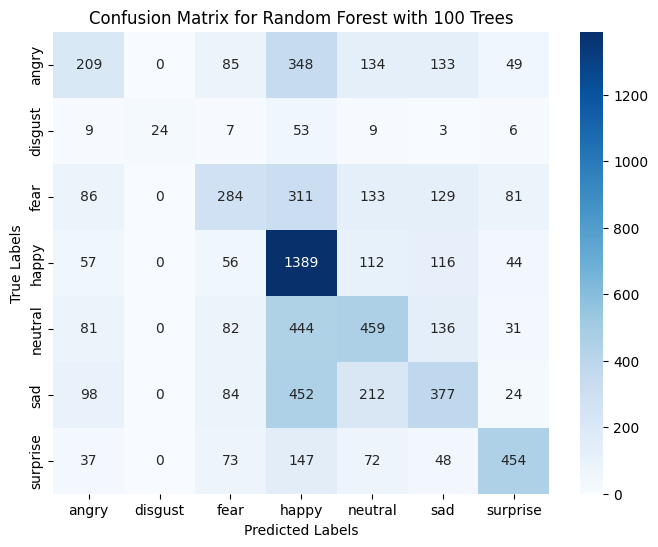

In [39]:
# Choose a model to visualize the confusion matrix for, here choosing the last one
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrices[-1], annot=True, fmt="d", cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Random Forest with 100 Trees')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()